# Анализ данных продаж игр для составления кампании на 2017 год

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

--------------------------------------------------------------------------------------------------------------------------------

В нашем распоряжении датасет с данными о продажах игр с 1980 по 2016 год, за 2016 год данные не полные.

Далее мы приведём данные в нужный нам порядок и изучим их внимательнее, определим период, который является актуальным и поможет нам с составлением прогноза на 2017 год, определим, как оценки критиков ии пользователей влияют на продажи игр, рассмотрим распределение рынка по жанрам и определим самый прибыльный, составим топ-5 популярных жанров и приставок в Северной Америке, Европе и Японии, а так же проверим две гипотезы: о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и о том, что средние пользовательские рейтинги жанров Action и Sports разные.

### Изучение данных

#### Импортируем библиотеки

In [1]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from scipy import stats as st

#### Импортируем данные из файла в датафрейм

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('D:\\games.csv')

#### Изучаем общую информацию о полученном датафрейме

In [3]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Отмечаем, что в столбце year_of_release после всех чисел стоит '.0', но год не может принимать дробные значения, можем поменять тип данных ячейки на целочисленный.

#### Строим общую гистограмму для всех числовых столбцов таблицы

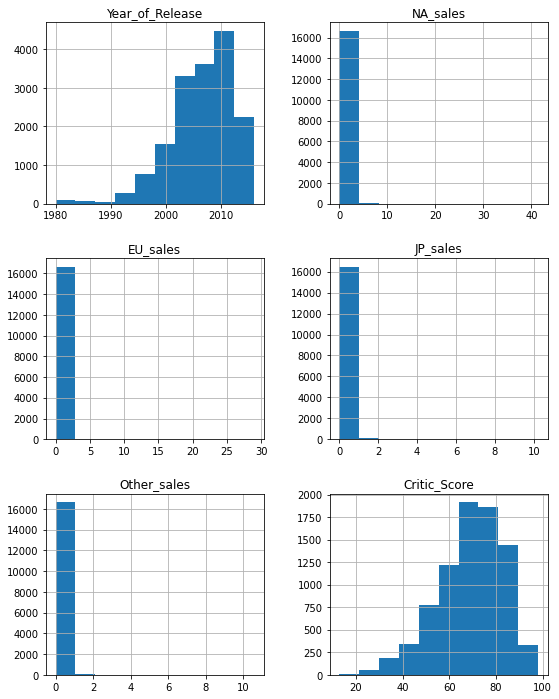

In [4]:
data.hist(figsize=(9, 12));

Отмечаем, что метод не вывел гистограмму для user_score, и действительно, если посмотреть в .info(), то столбец user_score имеет тип данных 'object', можем поменять на 'float'

После первичного знакомства с данными мы обнаружили два столбца, в которых нужно поменять тип данных, а так же мы теперь понимаем, что оценки критиков имеют близкое к нормальному распределение с положительным скосом, больше всего игр было выпущено в десятые года, что может помочь нам при составлении прогноза, а так же мы понимаем, что Северная Америка - крупнейший рынок, за ней идёт Европа, а затем - Япония и остальной мир.

### Предобработка данных

#### Приводим названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Начинаем обработку пропусков

Находим количество пропущенных значений в столбцах

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Главная цель нашего исследования - составление прогноза на 2017 год, поэтому игры без указания года выпуска мы можем отбросить, причина появления этих пропусков может быть технической. Посмотрим на игры без названия, раз их всего две, и решим, что делать с ними. Пропуски в столбцах с оценками возможно появились в результате отсутсвия игр на каком-либо сайте с рейтингом или одним общим рейтингом на все платформы, который был записан только на одну и утерян на остальных, не будем пытаться их заполнить. Пустые значения в столбце rating нужно будет как-то обозначить, чтобы не исказить результаты, а причина их появления может быть в том, что у них нет оценки в рейтинге ESRB (возможно они оценены как-то по-другому).

In [7]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные бесполезны ¯\_(ツ)_/¯

Возможно это какой-то сбой или ошибка оцифровки

Отбросим игры без названия и года выпуска

In [8]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])

#### Меняем тип данных в столбцах где это нужно

Меняем тип данных в столбце year_of_release на целочисленный

In [9]:
data.year_of_release = data.year_of_release.astype('int')
data.year_of_release.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Выводим список значений user_score - столбец со средней оценкой зрителей, который почему-то имеет нечисловой формат

In [10]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Нам необходимо поменять тип данных в столбце user_score на числовой, чтобы с ним можно было проводить операции, но в нем содержится аббревиатура 'tbd' - 'to be determened' у игр, на которые слишком мало рецензий, чтобы можно было делать вывыоды о том, как к ним относятся пользователи; мы можем заменить его на NaN, потому что для наших целей 'tbd' не несёт в себе никакого смысла

In [11]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Разделим на 10 оценки критиков, чтоды привести оценки критиков и пользователей к одному стилю

In [12]:
data.critic_score /= 10
data.critic_score.unique()

array([7.6, nan, 8.2, 8. , 8.9, 5.8, 8.7, 9.1, 6.1, 9.7, 9.5, 7.7, 8.8,
       8.3, 9.4, 9.3, 8.5, 8.6, 9.8, 9.6, 9. , 8.4, 7.3, 7.4, 7.8, 9.2,
       7.1, 7.2, 6.8, 6.2, 4.9, 6.7, 8.1, 6.6, 5.6, 7.9, 7. , 5.9, 6.4,
       7.5, 6. , 6.3, 6.9, 5. , 2.5, 4.2, 4.4, 5.5, 4.8, 5.7, 2.9, 4.7,
       6.5, 5.4, 2. , 5.3, 3.7, 3.8, 3.3, 5.2, 3. , 3.2, 4.3, 4.5, 5.1,
       4. , 4.6, 3.9, 3.4, 4.1, 3.6, 3.1, 2.7, 3.5, 2.6, 1.9, 2.8, 2.3,
       2.4, 2.1, 1.7, 1.3])

#### Обрабатываем пропущеные значения

Чтобы пропуски не могли исказить данные все незаполненные рейтинги назовём 'unknown'

In [13]:
data.rating = data.rating.fillna('unknown')

Смотрим на результаты

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### Проверяем датасет на дубликаты

In [15]:
data.duplicated().sum()

0

Дубликатов не обнаружено

#### Добавляем столбец с общим числом продаж

In [16]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

Мы не обнаружили в датафрейме дубликатов, что радует, а так же провели предобработку данных. Теперь у нас есть столбец с суммарными продажами игры во всех регионах, заполнены пропуски в поле рейтинга ESRB, чтобы данные не искажались, изменены типы столбцов, которые мы отметили во 2 части, а так же отсутствуют строки, пропуски в которых никак не помогли бы нам в нашем исследовании.

### Анализ данных

#### Актуализируем данные

Строим гистограмму для столбца year_of_release, которая покажет нам, сколько игр выходило в каждый год.

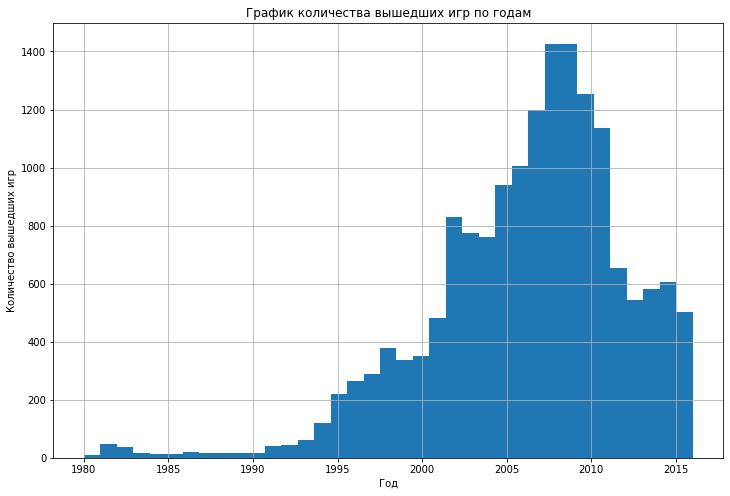

In [17]:
data.year_of_release.plot(kind='hist',
                          grid=True,
                          figsize=(12, 8),
                          bins=data.year_of_release.nunique(),
                          title='График количества вышедших игр по годам')
plt.xlabel("Год")
plt.ylabel("Количество вышедших игр")
plt.show()

Мы видим, что примерно до 1994 года игр выходило очень мало, соответственно рынок в это время отличался очень сильно, и данные за это время нерепрезентативны впринципе.

In [18]:
actual_data = data.query('year_of_release > 1993')

Теперь проанализируем, как продажи на игровых платформах ведут себя на временном отрезке.

Для начала определим самые популярные платформы за весь период наблюдений:

In [19]:
sales_by_platform = (
actual_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
                    )
sales_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Между 6 и 7 по популярности платформами разница больше чем в два раза - рассмотрим 6 самых популярных платформ.

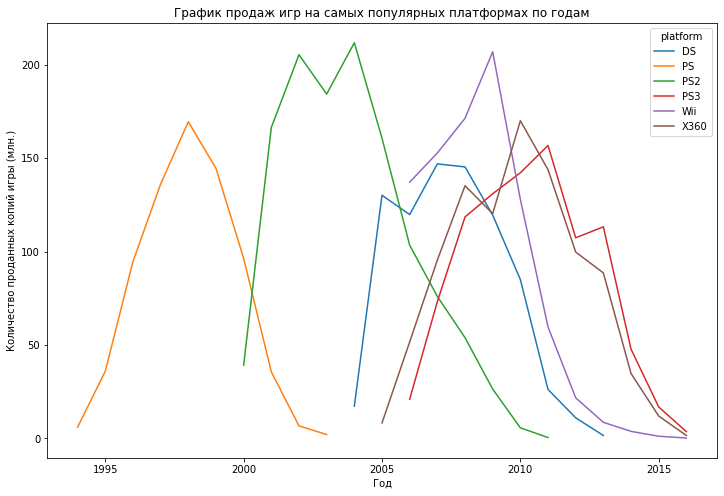

In [20]:
sales_by_platform = sales_by_platform.index[:6]

(
actual_data
    .query('platform in @sales_by_platform')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(12, 8), title='График продаж игр на самых популярных платформах по годам')
)

plt.xlabel("Год")
plt.ylabel("Количество проданных копий игры (млн.)")
plt.show()

Невооружённым взглядом видно, что среднее время, которое живёт игровая платформа - 9-10 лет, и пик продаж на ней приходится на середину её жизненного цикла (между четвёртым и пятым годами).

Исходя из этого, для построения прогноза на 2017 год возьмём данные за последние 5 лет - с 2012 года до 2016, данные за который могут быть представлены не в полном объёме.

In [21]:
actual_data = actual_data.query('year_of_release >= 2012')

#### Анализируем актуальный период

Посмотрим статистику по суммарным продажам и построим график.

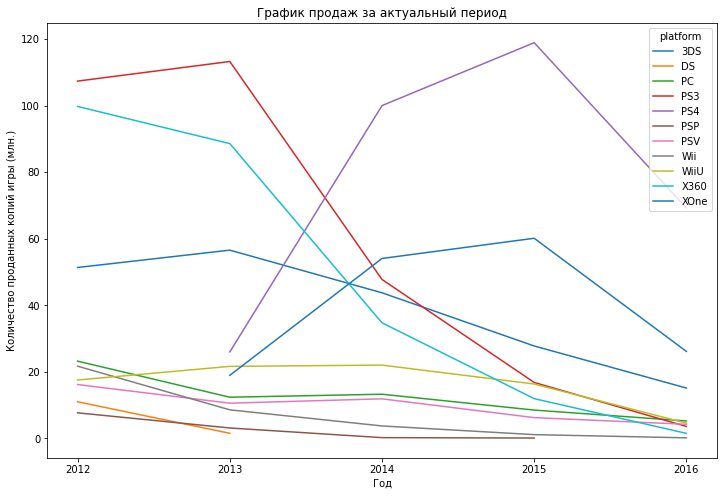

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [22]:
(
actual_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(xticks=actual_data.year_of_release.unique(),
          figsize=(12, 8),
          title='График продаж за актуальный период')
)

plt.xlabel("Год")
plt.ylabel("Количество проданных копий игры (млн.)")
plt.show()

(
actual_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

Мы видим, что игры для DS и PSP уже не продаются - эти приставки мы можем не рассматривать. Так же мы видим, что данные за 2012 год уже потеряли актуальность, перенесём начало анализируемого периода на год вперёд.

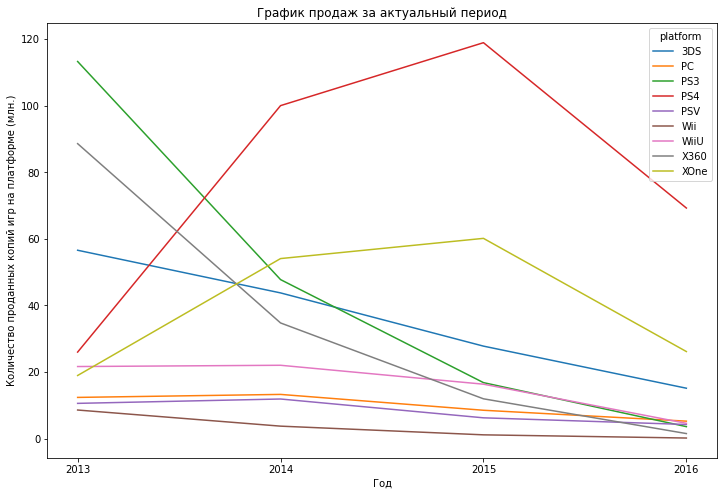

In [23]:
actual_data = actual_data.query('platform != ["PSP", "DS"] and year_of_release != 2012')

(
actual_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(xticks=actual_data.year_of_release.unique(),
          figsize=(12, 8), 
          title='График продаж за актуальный период')
)

plt.xlabel("Год")
plt.ylabel("Количество проданных копий игр на платформе (млн.)")
plt.show()

PS3 и X360 уже прошли свой пик, и продажи на них падают год за годом. PS4 и XOne наоборот - появились только в 2013 году, и снижение продаж (которое демонстрируют все платформы) - явно следствие того, что данные за 2016 год представленны не в полном объёме. Именно на эти приставки и стоит сделать ставку по прибыльности в 2017 году, особенно на PS4. 3DS тоже не стоит списывать со счетов - он, не смотря на снижающиеся продажи, всё ещё идёт на третьем месте. Wii это платформа, которую мы знаем ещё по графику самых популярных за всё время - в 2009 году ей завидовали все, кроме PS2, с которой они делили рынок, но сейчас она имеет самые низкие общие продажи. Остальные платформы (особенно с поправкой на неполноту данных за 2016) не имеют взлётов или падений.
 
Далее посмотрим на данные через призму диаграмм размаха:

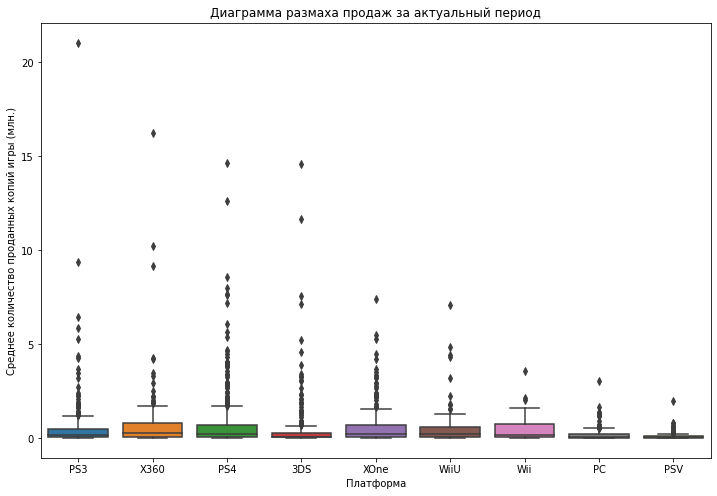

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.title('Диаграмма размаха продаж за актуальный период')
plt.xlabel("Платформа")
plt.ylabel("Среднее количество проданных копий игры (млн.)")
plt.show()

Чёрными точками обозначены выбросы - в нашем случае это игры, которые заработали больше, чем 99% своих конкурентов.

Посмотрим поближе на среднестатистические значения:

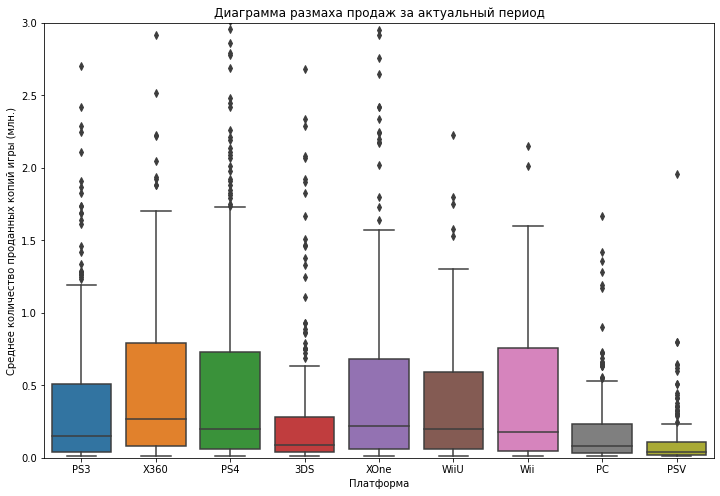

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.title('Диаграмма размаха продаж за актуальный период')
plt.xlabel("Платформа")
plt.ylabel("Среднее количество проданных копий игры (млн.)")
plt.ylim(0, 3)
plt.show()

Взглянув на этот график и сопоставив его с предыдущими, мы можем прийти к выводу, что 3DS может и является третьей по продажам платформой, но игры на ней продаются не очень хорошо - скорее всего их просто выходит много, а вот Wii будучи последней по общим продажам имеет очень неплохие показатели продаж, так что на ней скорее всего ситуация обратная - игр выходит мало, но многие из них имеют относительный успех. Если говорить про PS4 и XOne как про платформы на которые мы будем делать ставку, то можно добавить, что медиана XOne немного выше, но у PS4 выше третий квартиль, верхний ус и гораздо больше выбросов, так что PS4 скорее та приставка где выходит много хитовых игр, тогда как выходящие на XOne игры имеют меньший шанс провалиться.

#### Определяем влияние оценок на продажи

Смотрим, как влияют на продажи внутри самой популярной платформы (PS4) отзывы пользователей и критиков:

critic_score    0.406568
user_score     -0.031957
Name: total_sales, dtype: float64

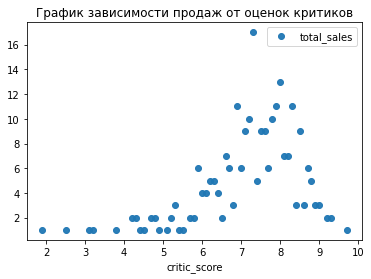

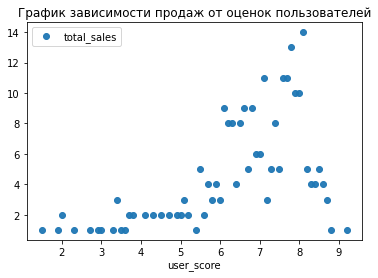

In [26]:
ps4_data = actual_data.query('platform == "PS4"')

(
ps4_data
    .pivot_table(index='critic_score', values='total_sales', aggfunc='count')
    .plot(style='o', title='График зависимости продаж от оценок критиков', alpha=.95)
);

(
ps4_data
    .pivot_table(index='user_score', values='total_sales', aggfunc='count')
    .plot(style='o', title='График зависимости продаж от оценок пользователей', alpha=.95)
);

# считаем корреляцию значений total_sales с critic_score и user_score
ps4_data[['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]

Первые выводы: оценки зрителей не влияют вообще, оценки критиков влияют слабо.

Рассмотрим остальные актуальные платформы:

In [27]:
for platform in actual_data.query('platform != "PS4"').platform.unique():
    print(platform)
    print(actual_data
              .query('platform == @platform')[['total_sales', 'critic_score', 'user_score']]
              .corr()['total_sales'][1:]
         )
print('\nВсе платформы')
actual_data[['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]

PS3
critic_score    0.334285
user_score      0.002394
Name: total_sales, dtype: float64
X360
critic_score    0.350345
user_score     -0.011742
Name: total_sales, dtype: float64
3DS
critic_score    0.357057
user_score      0.241504
Name: total_sales, dtype: float64
XOne
critic_score    0.416998
user_score     -0.068925
Name: total_sales, dtype: float64
WiiU
critic_score    0.376415
user_score      0.419330
Name: total_sales, dtype: float64
Wii
critic_score         NaN
user_score      0.682942
Name: total_sales, dtype: float64
PC
critic_score    0.196030
user_score     -0.093842
Name: total_sales, dtype: float64
PSV
critic_score    0.254742
user_score      0.000942
Name: total_sales, dtype: float64

Все платформы


critic_score    0.313789
user_score     -0.003068
Name: total_sales, dtype: float64

Корреляция продаж с оценками пользователей либо отсутсвует, либо очень слаба (на Wii, WiiU и 3DS), корреляция с оценками критиков выше но всё равно оказывает малое влияние.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Зависимость продаж от оценок пользователей и критиков проанализирована верно! </div>

#### Рассматриваем распределение по жанрам

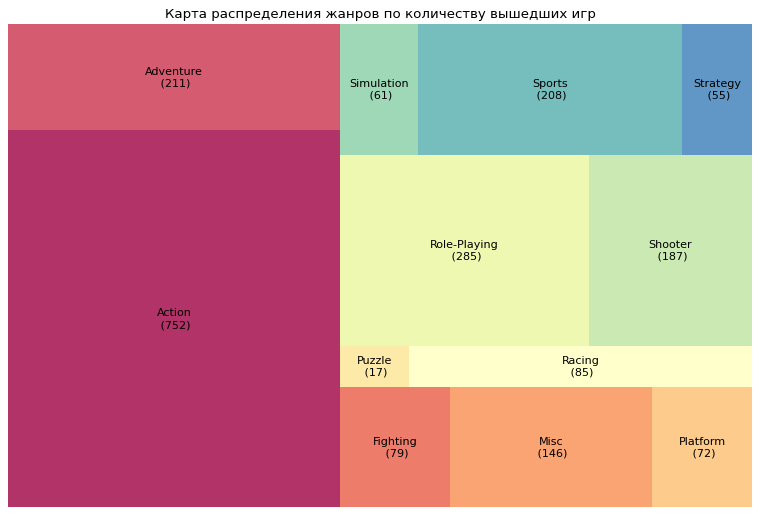

,name
genre,
Action,752
Role-Playing,285
Adventure,211
Sports,208
Shooter,187
Misc,146
Racing,85
Fighting,79
Platform,72


In [28]:
temp_data = actual_data.groupby('genre').size().reset_index(name='total_sales')
labels = temp_data.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = temp_data['total_sales'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Карта распределения жанров по количеству вышедших игр')
plt.axis('off')
plt.show()

(
actual_data
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
)

Больше всего выходит экшенов - более чем в два раза больше, чем ролевых игр, которые идут за ними. Шутеры, адвенчуры, спортивные игры - на третьем месте. Misc - это категория для игр, жанр которых сложно определить, поэтому их количеству не удивляемся. Из остальных категорий выделим пазлы как самые редко выпускаемые.

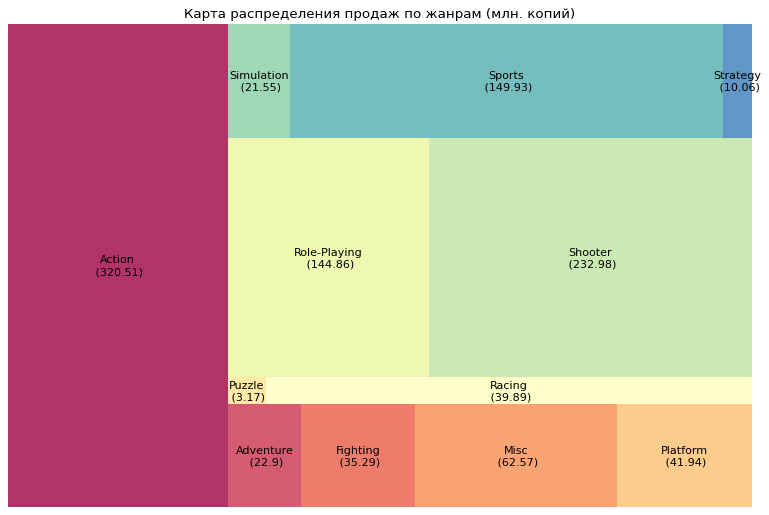

,total_sales
genre,
Action,320.51
Shooter,232.98
Sports,149.93
Role-Playing,144.86
Misc,62.57
Platform,41.94
Racing,39.89
Fighting,35.29
Adventure,22.90


In [29]:
temp_data = actual_data.groupby('genre').total_sales.sum().round(2).reset_index(name='total_sales')
labels = temp_data.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = temp_data['total_sales'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Карта распределения продаж по жанрам (млн. копий)')
plt.axis('off')
plt.show()

(
actual_data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

Игры жанра экшн - самые продаваемые, за ними идут шутеры, и третье место делят между собой спортивные и ролевые игры. Все вместе они занимают практически 3/4 рынка, остальные жанры делят оставшуюся четверть. Можем отметить, что пазлы продаются хуже всего, но их и выходит очень мало, а вот шутеры, которые на 5 месте по количеству вышедших игр, берут второе место по продажам.

Рассмотрим прибыльность всех жанров:

In [30]:
profit = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
profit['profitability'] = profit['sum'].total_sales / profit['count'].total_sales
profit.sort_values(by='profitability', ascending=False)

,sum,count,profitability
,total_sales,total_sales,
genre,,,
Shooter,232.98,187,1.245882
Sports,149.93,208,0.720817
Platform,41.94,72,0.582500
Role-Playing,144.86,285,0.508281
Racing,39.89,85,0.469294
Fighting,35.29,79,0.446709
Misc,62.57,146,0.428562
Action,320.51,752,0.426210


Действительно, шутеры оказались самыми прибыльными, спортивные игры тоже продаются хорошо, экшены - самые продаваемые и производимые - ниже середины, а вот адвенчуры, третие по количеству выходов, находятся на самом дне окупаемости.

### Портрет покупателя  по регионам

Создаём функцию для построения распределений:

In [31]:
def top_5_plot(t_data, t_region, t_index, t_title):
    (
    t_data
        .pivot_table(index=t_index, values=t_region, aggfunc='sum')
        .sort_values(by=t_region, ascending=False)[:5]
        .plot(kind='bar',
            legend=False,
            title=t_title)
    )
    plt.ylabel("Общее количество проданных копий игры (млн.)")
    plt.show()

#### Северная Америка

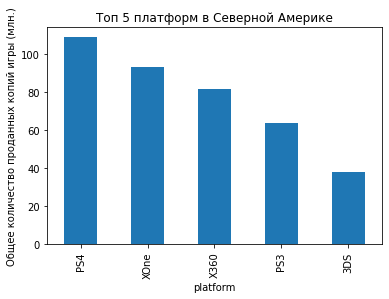

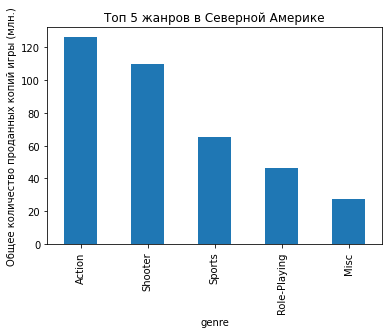

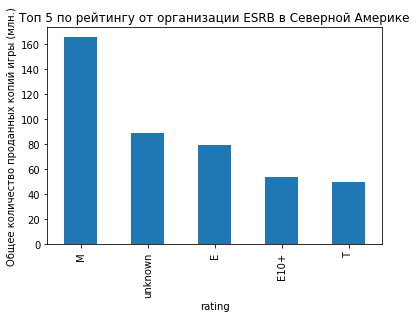

In [32]:
top_5_plot(t_data=actual_data, t_region='na_sales', t_index='platform', t_title='Топ 5 платформ в Северной Америке')
top_5_plot(t_data=actual_data, t_region='na_sales', t_index='genre', t_title='Топ 5 жанров в Северной Америке')
top_5_plot(t_data=actual_data,
           t_region='na_sales',
           t_index='rating',
           t_title='Топ 5 по рейтингу от организации ESRB в Северной Америке')

- самыми популярными платформами являются PS4 и XOne, затем идут их прошлые версии и 3DS
- топ 5 популярных жанров повторяет топ 5 популярных жанров из пункта 4.4
- наибольшим спросом пользуются игры для взрослой аудитории, много игр для которых мы указали рейтинг unknown

В целом Северная Америка кажется регионом который не имеет уникальных особенностей.

#### Европа

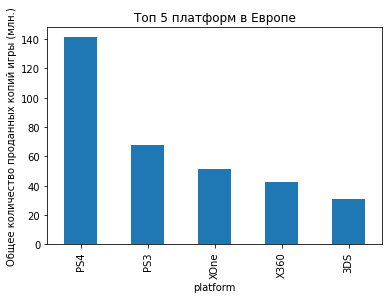

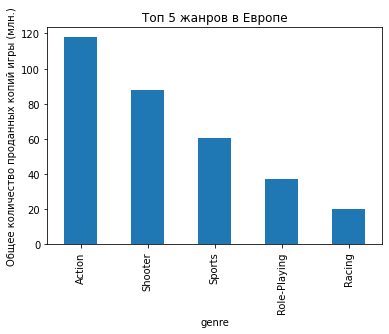

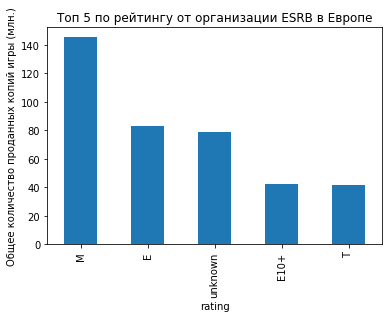

In [33]:
top_5_plot(t_data=actual_data, t_region='eu_sales', t_index='platform', t_title='Топ 5 платформ в Европе')
top_5_plot(t_data=actual_data, t_region='eu_sales', t_index='genre', t_title='Топ 5 жанров в Европе')
top_5_plot(t_data=actual_data,
           t_region='eu_sales',
           t_index='rating',
           t_title='Топ 5 по рейтингу от организации ESRB в Европе')

- в Европе продажи PS обгоняют продажи X
- жанр гонок пользуется здесь бОльшим спросом чем в остальных регионах
- игры рейтинга E обгоняют те, которые мы обозначили как unknown

Приставка PS4 - с запасом самая популярная платформа в Европе прямо сейчас, учитывая, что в отрезок данных входят те года, когда PS3 и X360 ещё обходили свои новые аналоги.

#### Япония

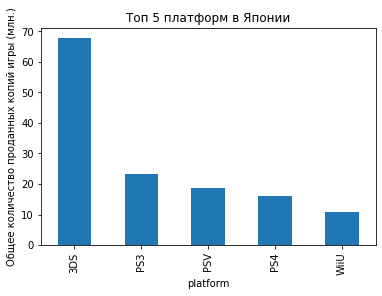

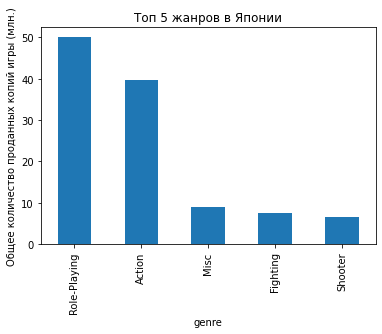

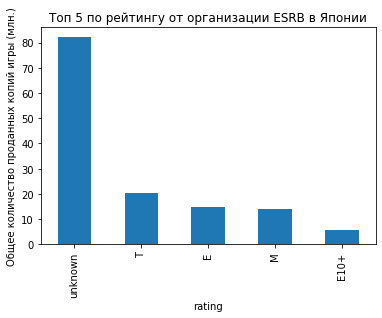

In [34]:
top_5_plot(t_data=actual_data, t_region='jp_sales', t_index='platform', t_title='Топ 5 платформ в Японии')
top_5_plot(t_data=actual_data, t_region='jp_sales', t_index='genre', t_title='Топ 5 жанров в Японии')
top_5_plot(t_data=actual_data,
           t_region='jp_sales',
           t_index='rating',
           t_title='Топ 5 по рейтингу от организации ESRB в Японии')

- 3DS - самая популярная платформа, в топ 5 PSV и WiiU, но нет XOne и X360
- ролевые игры опережают экшны, шутеры гораздо менее популярны, файтинги 4 по популярности жанр
- большая часть игр видимо не имеет рейтинга ESRB, скорее всего это локальный продукт
- у популярных здесь платформ корреляция с оценками пользователей и критиков выше

Япония сильно отличается от других рынков: сюда практически не следует возить игры для X360 и XOne, упор стоит сделать на ролевые игры и файтинги для 3DS, разнообразных PS, и WiiU.

### Проверка гипотез

#### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные

In [35]:
xone = actual_data.query('platform == "XOne"').user_score
pc = actual_data.query('platform == "PC"').user_score
alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False, nan_policy='omit')

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось, в нашей выборке средние пользовательские оценки игр на Xbox One и PC не имеют существенных отличий

#### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные

In [36]:
action = actual_data.query('genre == "Action"').user_score
sports = actual_data.query('genre == "Sports"').user_score

results = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4191414517472358e-20
Отвергаем нулевую гипотезу


Отвергнута нулевая гипотеза, подтверждена альтернативная - с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия

### Общий вывод

На этапе предобработки мы не обнаружили в датафрейме дубликатов, заполнили пропуски в поле рейтинга ESRB чтобы избежать искажения данных в 5 части, какие-то пропуски удалили, а какие-то сделали сами (в столбце с оценками пользователей заменили значение tbd на пропуски) а так же привели все столбцы к тому типу, который они должны иметь.

На этапе анализа мы актуализировали выборку до данных с 2013 года, узнали, что в среднем платформы живут 10 лет и их пик приходится на 5 год продаж, определили перспективные платформы (XOne и особенно PS4), узнали, что оценки пользователей в среднем не влияют на продажи игр, а оценки критиков влияют но слабо. Определили самый популярный жанр (Action) и самый прибыльный (Shooter).

Если давать какие-то конкретные рекомендации отделу маркетинга, то в Северной Америке будут пользаваться спросом экшены, шутеры, спортивные и ролевые игры для XOne и PS4 рейтинов M и E. В Европе рынок достаточно сильно похож нв Американский, больший акцент стоит сделать на PS4 и добавить гонки в список потенциально прибыльных жанров. На пользовательские оценки внимание можно не обращать внимания, оценки критиков будут влиять на продажи, но неменого. В Японии ситуация другая - там в списке самых популярных приставок - 3DS, и уже потом PS4, PSV и WiiU, и для них корреляция с оценками пользователей и критиков выше, два самых популярных жанра - экшены и ролевые (также там любят файтинги), а рейтинг там свой, поэтому о нём мы говорить не можем.

Наконец, мы проверили две гипотезы - что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и что средние пользовательские рейтинги жанров Action и Sports разные, и ни одну из них не опровергли, так что скорее всего они соответствуют действительности.